Gradient Boosted Machines trained on data subsets

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
from sklearn import metrics
#from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.utils import shuffle
import seaborn as sns
import glob
import os
from dataCleaning import bas_filter
%matplotlib inline

C:\Users\Owner\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Spring 2017 Training Data

Trained plant with 2017 February, March, and April minute data
Tested data from the rest of the year

In [2]:
lst_train = ['Plt1 m 2017-02.csv', 'Plt1 m 2017-03.csv', 'Plt1 m 2017-04.csv']
lst_test = [
    'Plt1 m 2016-11.csv', 'Plt1 m 2016-11.csv', 'Plt1 m 2017-01.csv',
    'Plt1 m 2017-05.csv', 'Plt1 m 2017-06.csv', 'Plt1 m 2017-07.csv',
    'Plt1 m 2017-08.csv', 'Plt1 m 2017-09.csv', 'Plt1 m 2017-10.csv'
]

In [3]:
df_train, df_test = bas_filter.train_single_plt(
    '../../Plt1', lst_train, lst_test,
    '../../Plt1/Plt1 Points List.xlsx',
    include_alarms=False, dim_remove=['CHWST', 'CDWVLV']
)
df_test.shape

Filtering Training Set
['../../Plt1\\Plt1 m 2017-02.csv']
['../../Plt1\\Plt1 m 2017-03.csv']
['../../Plt1\\Plt1 m 2017-04.csv']
Descriptors in the points list that are not in the datasets.
CommunicationFailure_COV
CH3COM1F
CH3Ready
CH4COM1F
CH4Ready
CH4SURGE
CH5COM1F
CH5Ready
Original data contains 25623 points and 413 dimensions.
A CDWP3SPD_Alarm was noted and 536 datapoints were removed from the dataset.
A CDWP4SPD_Alarm was noted and 342 datapoints were removed from the dataset.
A CDWP5SPD_Alarm was noted and 15497 datapoints were removed from the dataset.
A CH4ALARM was noted and 11 datapoints were removed from the dataset.
A CTTR_ALARM was noted and 74 datapoints were removed from the dataset.
Filtered data contains 8910 points and 164 dimensions.
Filtering Test Set
['../../Plt1\\Plt1 m 2016-11.csv']
['../../Plt1\\Plt1 m 2016-11.csv']
['../../Plt1\\Plt1 m 2017-01.csv']
['../../Plt1\\Plt1 m 2017-05.csv']
['../../Plt1\\Plt1 m 2017-06.csv']
['../../Plt1\\Plt1 m 2017-07.csv']
['../../

(26872, 164)

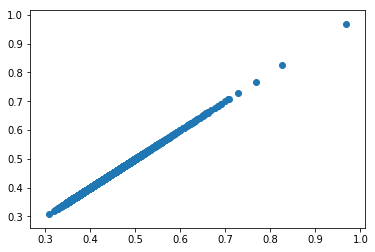

In [4]:
plt.scatter(df_train['kW/Ton'], df_train['kW/Ton'])

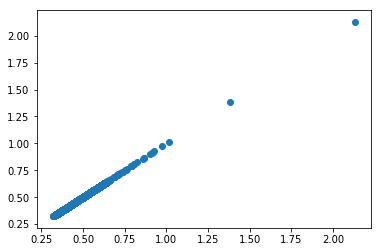

In [5]:
plt.scatter(df_test['kW/Ton'], df_test['kW/Ton'])

In [6]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [7]:
model_spring = GradientBoostingRegressor(**params)

In [8]:
ytrain = df_train['kW/Ton'].values
ytest = df_test['kW/Ton'].values
xtrain = df_train.drop(['kW/Ton'], axis=1).values
xtest = df_test.drop(['kW/Ton'], axis=1).values

In [9]:
xtrain.shape

(8910, 163)

In [10]:
ytrain.shape

(8910,)

In [11]:
model_spring.fit(xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
ypred = model_spring.predict(xtest)

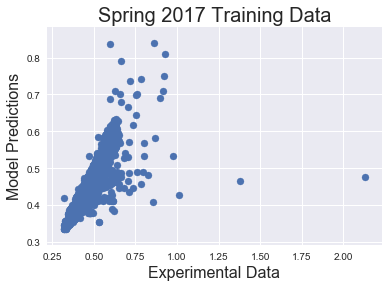

In [13]:
sns.set()
plt.figure()
plt.scatter(ytest, ypred)
fs = 20
plt.title("Spring 2017 Training Data", fontsize=fs)
plt.xlabel("Experimental Data", fontsize=fs-4)
plt.ylabel("Model Predictions", fontsize=fs-4)
plt.savefig('r2_values_spring.png', bbox_inches='tight')

R2 value

In [14]:
test_score = r2_score(ytest, ypred)
test_score

0.6695124034708368

Feature Importance

In [15]:
feature_importance = model_spring.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
x = df_test.drop(['kW/Ton'], axis=1).columns[sorted_idx]
imp = feature_importance[sorted_idx]

In [16]:
df_feats = pd.DataFrame({'feature_name': x, 'feat_import': imp})

In [17]:
df_feats

,feat_import,feature_name
0,0.000000,CDWVLV2
1,0.000000,SCHWP3S
2,0.000000,SCHWP3SS
3,0.000000,SCHWP4S
4,0.000000,SCHWP4SS
5,0.000000,CDWP5S
6,0.000000,CDWP5SS
7,0.000000,CT4EVLV
8,0.000000,CT4S
9,0.000000,CT4SS


In [18]:
df_feats.to_csv('Feat_imp_spring_test.csv')